In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from scipy.stats import kurtosis
from sklearn.preprocessing import StandardScaler


In [2]:
data = pd.read_csv("/content/Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


#### Knowing the data

In [3]:
print(data.shape)
data.info()

(400, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


#### There are not any null values, so need to worry about missing values 

In [4]:
data['Purchased'].unique()

array([0, 1])

In [5]:
## Removing User ID as it will not play any role in classification
data.drop('User ID',axis =1, inplace=True)
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [6]:
data.duplicated().sum()

20

In [7]:
data.drop_duplicates(inplace=True)
data

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [8]:
data.describe()

,Age,EstimatedSalary,Purchased
count,380.000000,380.000000,380.000000
mean,37.586842,70421.052632,0.368421
std,10.592492,34604.155483,0.483012
min,18.000000,15000.000000,0.000000
25%,29.000000,43000.000000,0.000000
50%,37.000000,70500.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [9]:
data.nunique()

Gender               2
Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64

## EDA 
 ----- 

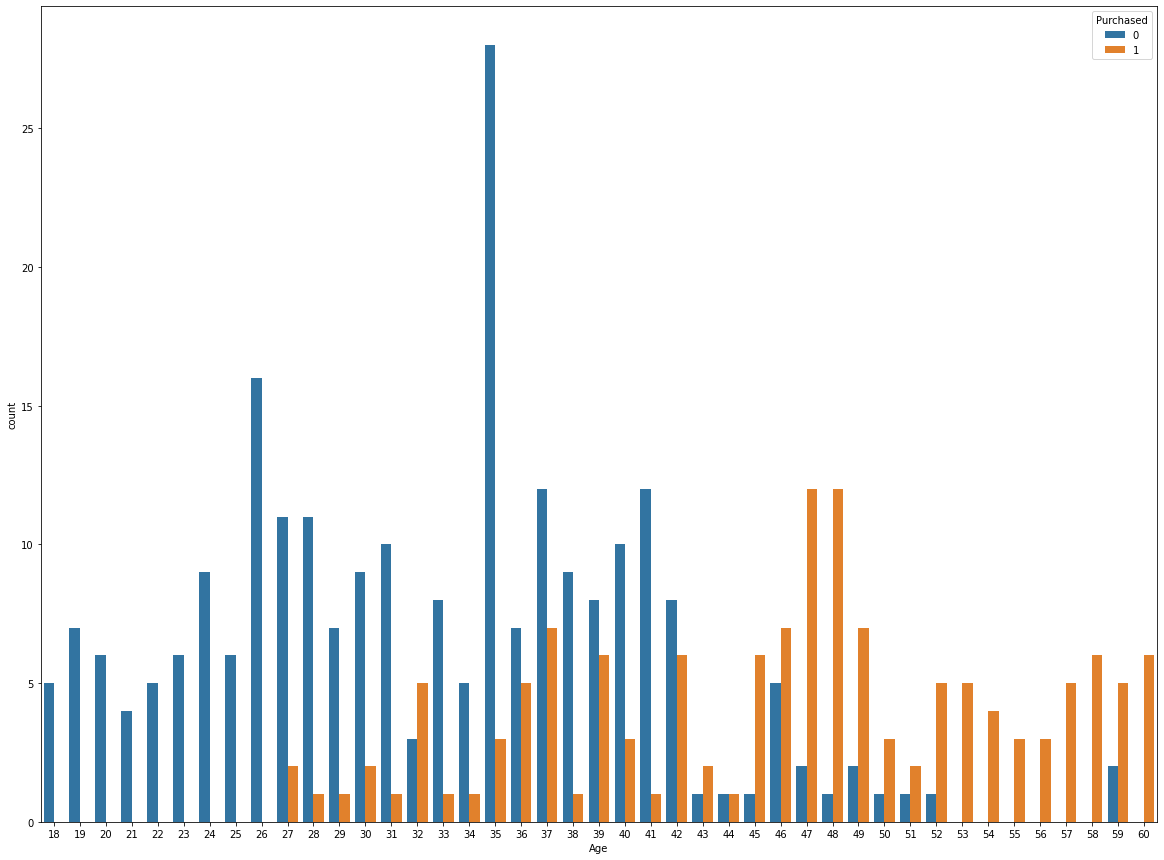

In [10]:
# fig,axes  = plt.subplots(1,2,figsize= (20,8))
plt.figure(figsize=(20,15))
sns.countplot(data = data,x ='Age',hue = 'Purchased')
# sns.countplot(data = data, x ='EstimatedSalary',hue = 'Purchased',ax= axes[1])
plt.show()


### So most of the purchased has been made by elder people 

#### lets plot the histogram for better convenience

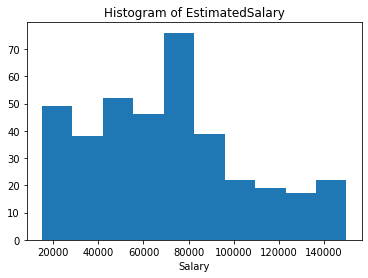

In [11]:
plt.hist(data['EstimatedSalary'])
plt.title('Histogram of EstimatedSalary')
plt.xlabel('Salary')
plt.show()

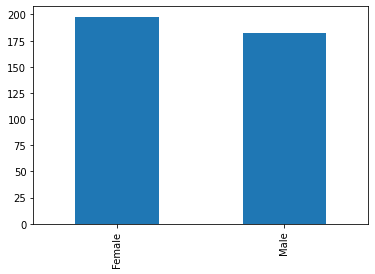

In [12]:
data['Gender'].value_counts().plot(kind='bar')
plt.show()

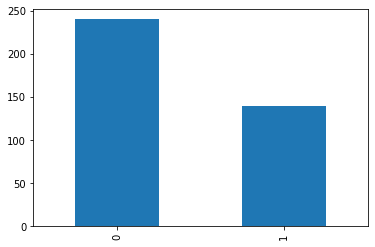

In [13]:
data['Purchased'].value_counts().plot(kind='bar')
plt.show()

In [14]:

temp_data =data
temp_data.replace(['Male','Female'],(0,1),inplace=True)
# temp_data['Gender'].replace('Female',0,inplace=True)
temp_data.groupby(['Purchased'])['Gender'].agg(['sum','count'])

,sum,count
Purchased,,
0,121,240
1,77,140


##### From the above table, we can see there is almost equal %(~50%) of males and females in both 'Purchased' and 'Not Purchased' category.So it hardly matter whether you are male or female in the classification

###  Distribution of data points

---




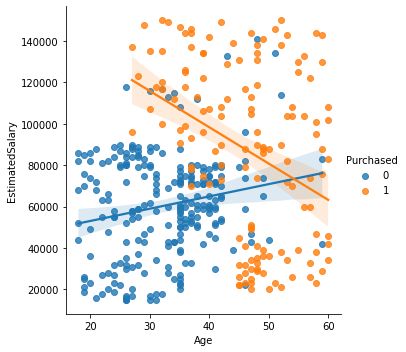

In [15]:
sns.lmplot(x='Age',y='EstimatedSalary',hue ='Purchased',data = data)
plt.show()

##### We can observe that if novel data point is given in top right corner or bottom left corner, it can be easily classified but problem will arise in the middle.

### Checking Outliers

- - - 

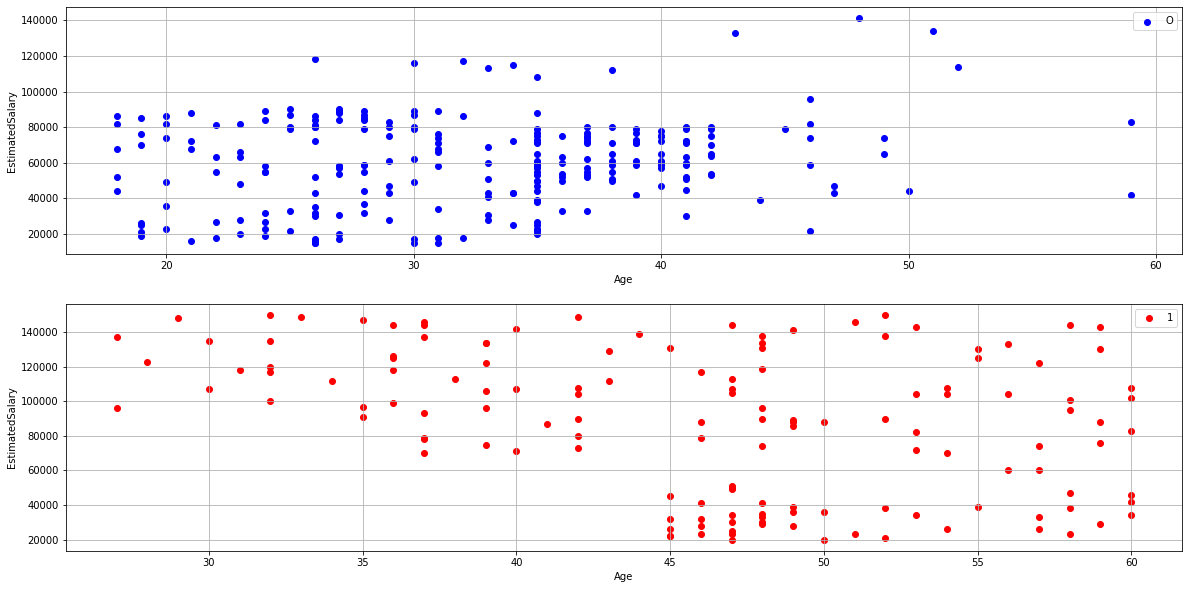

In [16]:
## Having a look on Scatter plots
fig,ax = plt.subplots(2,figsize=(20,10))

ax[0].scatter(data[data['Purchased']==0]['Age'],data[data['Purchased']==0]['EstimatedSalary'], c='blue')

ax[0].set_xlabel('Age')
ax[0].set_ylabel('EstimatedSalary')
ax[0].legend('O')
ax[0].grid('on')

ax[1].scatter(data[data['Purchased']==1]['Age'],data[data['Purchased']==1]['EstimatedSalary'], c='red')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('EstimatedSalary')
ax[1].legend('1')
ax[1].grid('on')


plt.show()


In [17]:
# Finding Kurtosis value of feature vectors
print("Kurtosis of distribution of AGE: {}".format(kurtosis(data['Age'])))
print("Kurtosis of distribution of Weight: {}".format(kurtosis(data['EstimatedSalary'])))

Kurtosis of distribution of AGE: -0.681635333978285
Kurtosis of distribution of Weight: -0.4996288409315972


#### As kurtosis is less than 4, hence no outliers are present 

### Checking Correlation

- -  - 


<Axes: >

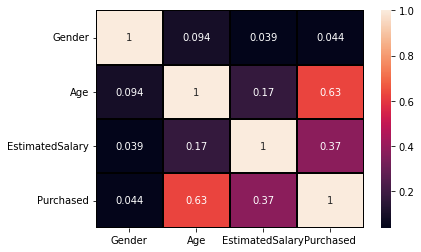

In [18]:
correlation = data.corr()
sns.heatmap(correlation,linecolor='black',linewidth=2,annot =True)

#### 'Age' have the highest correlation with target variable,then comes 'EstimatedSalary' and 'Gender' have nearly zero correlation with target variable (this matches with above conclusion, we made about 'Gender')

## Data Preprocessing
- - - 

### Label Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
labeler = LabelEncoder()
data['Gender']= labeler.fit_transform(data['Gender'])

In [21]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


In [22]:
X= data.drop('Purchased',axis=1)
Y= data['Purchased']


In [23]:
  # Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.30, random_state=0)  
print(x_train.shape , x_test.shape , y_train.shape, y_test.shape)      

(266, 3) (114, 3) (266,) (114,)


#### Standardise the data

In [24]:
st_x = StandardScaler()
x_train= st_x.fit_transform(x_train)  
x_test= st_x.transform(x_test)

### Linear SVM

- - - -

In [25]:
from sklearn.svm import SVC # "Support vector classifier"  
model = SVC(kernel='linear', random_state=0)  
model.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [26]:
y_pred= model.predict(x_test)  

In [27]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy score comes out to be: {0:.4f}%".format(acc*100))

Accuracy score comes out to be: 84.2105%


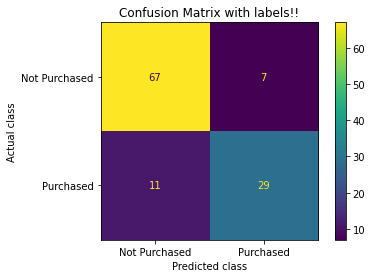

In [28]:
matrix = confusion_matrix(y_test,y_pred)
cmd_obj = ConfusionMatrixDisplay(matrix, display_labels=['Not Purchased', 'Purchased'])

cmd_obj.plot()
cmd_obj.ax_.set(
                title='Confusion Matrix with labels!!', 
                xlabel='Predicted class', 
                ylabel='Actual class')
plt.show()

In [29]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.859     0.905     0.882        74
           1      0.806     0.725     0.763        40

    accuracy                          0.842       114
   macro avg      0.832     0.815     0.822       114
weighted avg      0.840     0.842     0.840       114



#*Polynomial SVM*

- - - 

In [30]:
# Creating the SVM model with polynomial kernel function
def make_model(p):

  svm_poly = SVC(kernel='poly', degree=p)

  # Training the model on the training set
  svm_poly.fit(x_train, y_train)

  # Predicting on the testing set
  y_pred_poly = svm_poly.predict(x_test)
  # Calculating the accuracy score
  return  accuracy_score(y_test, y_pred_poly),y_pred_poly
  # print("Accuracy with polynomial kernel: {:.3f}%".format(accuracy_poly*100))  

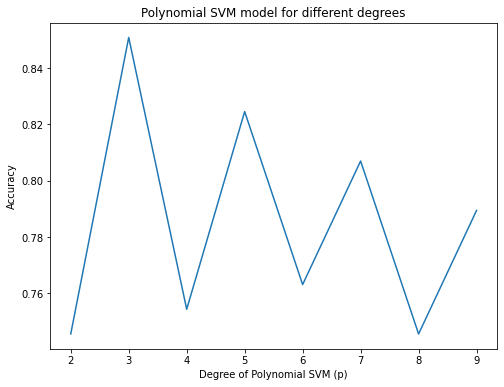

In [31]:
accuracy_list = []
for p in range(2,10):
  accuracy,y = make_model(p)
  accuracy_list.append(accuracy)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(2,10), accuracy_list)
ax.set_xlabel('Degree of Polynomial SVM (p)')
ax.set_title('Polynomial SVM model for different degrees')
ax.set_ylabel('Accuracy');
  

### From the above plot, we can see that for *odd* degree polynomials model show high accuracy and maximum accuracy has been shown by model of degree - '3'

In [32]:
## For degree 3:
acc,y_pred_poly = make_model(3)
print("Accuracy comes out to be: {:.6}%".format(acc*100))

Accuracy comes out to be: 85.0877%


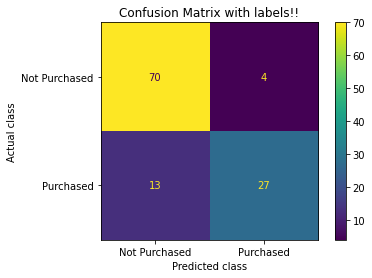

In [33]:
matrix_poly = confusion_matrix(y_test,y_pred_poly)
cmd_obj = ConfusionMatrixDisplay(matrix_poly, display_labels=['Not Purchased', 'Purchased'])

cmd_obj.plot()
cmd_obj.ax_.set(
                title='Confusion Matrix with labels!!', 
                xlabel='Predicted class', 
                ylabel='Actual class')
plt.show()

In [34]:
print(metrics.classification_report(y_test, y_pred_poly, digits=3))

              precision    recall  f1-score   support

           0      0.843     0.946     0.892        74
           1      0.871     0.675     0.761        40

    accuracy                          0.851       114
   macro avg      0.857     0.810     0.826       114
weighted avg      0.853     0.851     0.846       114



### Gaussian SVM

---

In [35]:
# Creating the SVM model with Gaussian radial basis kernel function
svm_rbf = SVC(kernel='rbf')

# Training the model on the training set
svm_rbf.fit(x_train, y_train)

# Predicting on the testing set
y_pred_rbf = svm_rbf.predict(x_test)

# Calculating the accuracy score
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print("Accuracy with Gaussian radial basis kernel: {:.4}%".format(accuracy_rbf*100))

Accuracy with Gaussian radial basis kernel: 89.47%


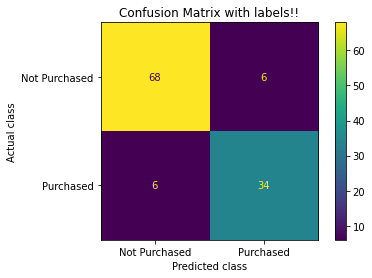

In [36]:
matrix_rbf = confusion_matrix(y_test,y_pred_rbf)
cmd_obj = ConfusionMatrixDisplay(matrix_rbf, display_labels=['Not Purchased', 'Purchased'])

cmd_obj.plot()
cmd_obj.ax_.set(
                title='Confusion Matrix with labels!!', 
                xlabel='Predicted class', 
                ylabel='Actual class')
plt.show()

In [37]:
print(metrics.classification_report(y_test, y_pred_rbf, digits=3))

              precision    recall  f1-score   support

           0      0.919     0.919     0.919        74
           1      0.850     0.850     0.850        40

    accuracy                          0.895       114
   macro avg      0.884     0.884     0.884       114
weighted avg      0.895     0.895     0.895       114



### Compare models

- - - 

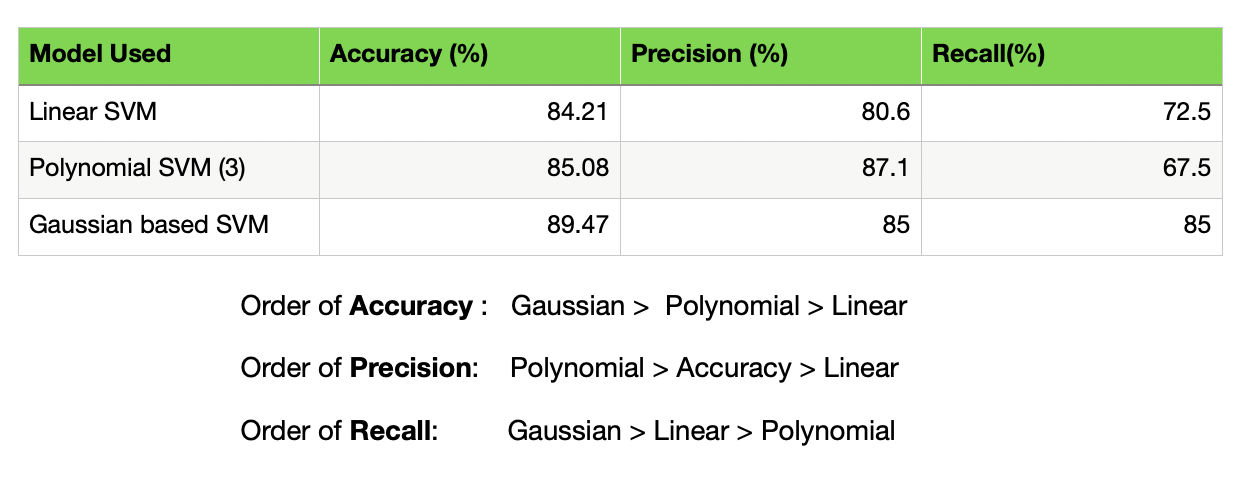

### Visualization in 3D and 2D

- - - 

#### Linear SVM

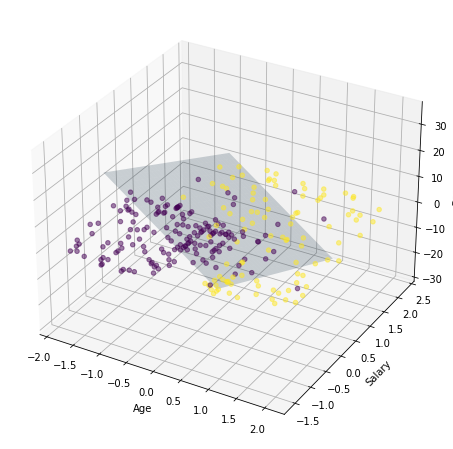

In [38]:
# Define the ranges of the features
X= x_train
Y= y_train
age_range = np.arange(X[:,0].min(), X[:,0].max(), 0.1)
gender_range = np.arange(X[:,1].min(), X[:,1].max(), 0.1)
salary_range = np.arange(X[:,2].min(), X[:,2].max(), 0.1)

# Create a meshgrid of the features
age_mesh, gender_mesh, salary_mesh = np.meshgrid(age_range, gender_range, salary_range)
X_mesh = np.c_[age_mesh.ravel(), gender_mesh.ravel(), salary_mesh.ravel()]
# X_mesh = scaler.transform(X_mesh)

# Predict the target for the meshgrid
y_mesh = model.predict(X_mesh)

# Reshape the predictions to the shape of the meshgrid
y_mesh = y_mesh.reshape(age_mesh.shape)

# Plot the data points and the hyperplane
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter( X[:,1], X[:,2],X[:,0], c=Y, marker='o', alpha=0.5)
ax.set_xlabel('Age')
ax.set_zlabel('Gender')
ax.set_ylabel('Salary')

## Taking 'Age' and 'Estimated Salary' as these have high correlation with target variable
xx, yy = np.meshgrid( age_range,salary_range)
z = (-model.intercept_[0] - model.coef_[0][1]*xx - model.coef_[0][2]*yy) / model.coef_[0][0]
ax.plot_surface(xx, yy, z, alpha=0.2)

# Show the plot
plt.show()

In [39]:
def visualize_linear(data_x,data_y,type):
  plt.figure(figsize=(10, 8))
  # Plotting our two-features-space
  sns.scatterplot(x=data_x[:, 1], 
                  y=data_x[:, 2], 
                  hue=data_y, 
                  );


  # Constructing a hyperplane using a formula.
  w = model.coef_[0]           # w consists of 2 elements
  b = model.intercept_[0]      # b consists of 1 element
  x_points = np.linspace(-1, 1.5)    # generating x-points from -1 to 1
  y_points = -(w[1] / w[2]) * x_points - b / w[2]  # getting corresponding y-points
  # Plotting a red hyperplane
  plt.plot(x_points, y_points, c='r');
  plt.xlabel('Age')
  plt.ylabel('EstimatedSalary')
  plt.title('SVM Classifier on {} Set (kernel =\'linear\')'.format(type))
  plt.show()

### 2D PLOTS

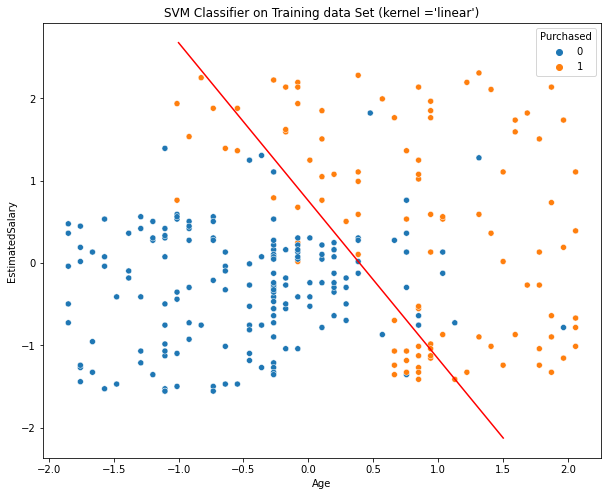

In [40]:
visualize_linear(x_train,y_train,'Training data')

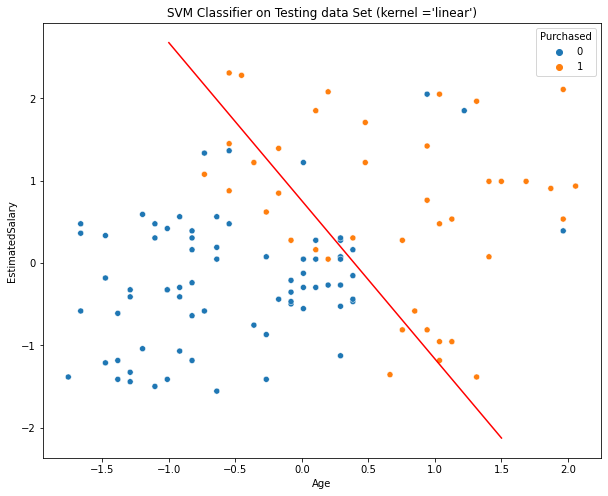

In [41]:
visualize_linear(x_test,y_test,'Testing data')

### Gaussian based SVM

In [42]:
# Lets consider 'Age' and 'EstimatedSalary' for making plot, as these have more correlation
X_ = data.drop(['Gender','Purchased'],axis=1)
Y_ = data['Purchased']
x_train_, x_test_, y_train_, y_test_= train_test_split(X_, Y_, test_size= 0.30, random_state=0)  
x_train_= st_x.fit_transform(x_train_)  
x_test_= st_x.transform(x_test_)

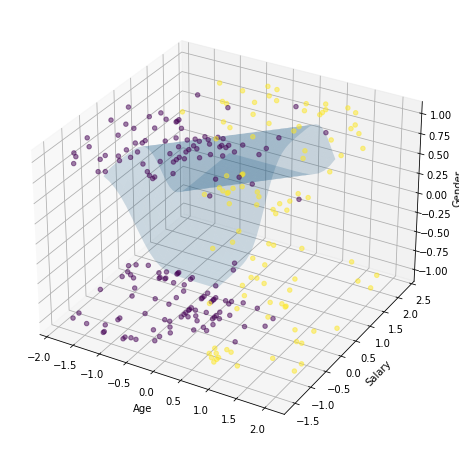

In [44]:
# Define the ranges of the features
X= x_train
Y= y_train
age_range = np.arange(X[:,0].min(), X[:,0].max(), 0.1)
gender_range = np.arange(X[:,1].min(), X[:,1].max(), 0.1)
salary_range = np.arange(X[:,2].min(), X[:,2].max(), 0.1)

# Create a meshgrid of the features
age_mesh, gender_mesh, salary_mesh = np.meshgrid(age_range, gender_range, salary_range)
X_mesh = np.c_[age_mesh.ravel(), gender_mesh.ravel(), salary_mesh.ravel()]
# X_mesh = scaler.transform(X_mesh)

# Predict the target for the meshgrid
y_mesh = svm_rbf.predict(X_mesh)

# Reshape the predictions to the shape of the meshgrid
y_mesh = y_mesh.reshape(age_mesh.shape)

# Plot the data points and the hyperplane
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter( X[:,1], X[:,2],X[:,0], c=Y, marker='o', alpha=0.5)
ax.set_xlabel('Age')
ax.set_zlabel('Gender')
ax.set_ylabel('Salary')

## Taking 'Age' and 'Estimated Salary' as these have high correlation with target variable
xx, yy = np.meshgrid( age_range,salary_range)
gamma = 1/(2*x_train_.var());
dist = (np.linalg.norm(xx-yy))

dist = []
dist.append([(a-b)*(a-b) for a, b in zip(xx, yy)])
dist = np.squeeze(np.array(dist))

z = np.exp(-gamma*(dist**2))
ax.plot_surface(xx, yy, z, alpha=0.2)

# # Show the plot
plt.show()

In [45]:
svm_rbf_2 = SVC(kernel='rbf') 
svm_rbf_2.fit(x_train_, y_train_)

SVC()

In [46]:
# Plotting the decision boundary for the Gaussian radial basis kernel model
def visualize_gaussian(data_x,data_y,type):
  # Creating a meshgrid to plot the decision boundary
  x_min, x_max = x_train_[:, 0].min() - 1, x_train_[:, 0].max() + 1
  y_min, y_max = x_train_[:, 1].min() - 1, x_train_[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

  # Plotting the decision boundary and the training set
  plt.figure(figsize=(10, 8))

  # Plotting the decision boundary for the polynomial kernel model
  Z_rbf = svm_rbf_2.predict(np.c_[xx.ravel(), yy.ravel()])
  Z_rbf = Z_rbf.reshape(xx.shape)
  plt.contourf(xx, yy, Z_rbf, alpha=0.4)
  plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=20, edgecolor='r')
  # ax[0].set_title("SVM with Polynomial Kernel ({})".format(type))
  plt.title("SVM with Gaussian Kernel ({})".format(type))
  plt.xlabel('Age')
  plt.ylabel('EstimatedSalary')
  plt.show()




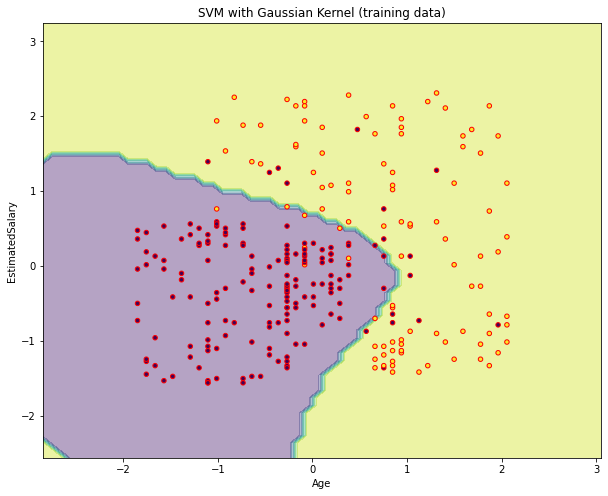

In [47]:
visualize_gaussian(x_train_,y_train_,'training data')

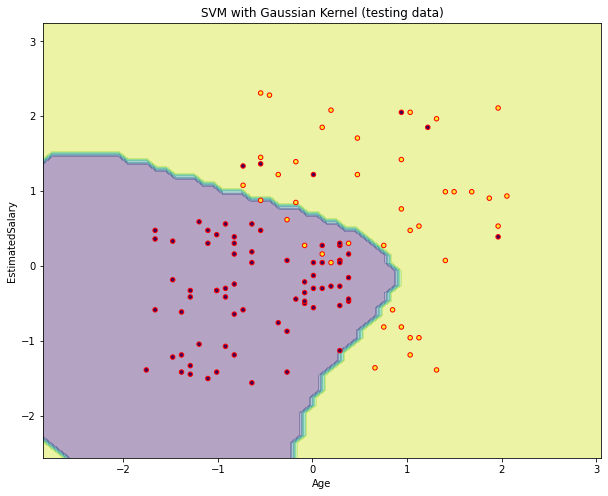

In [49]:
visualize_gaussian(x_test_,y_test_,'testing data')

### Polynomial Based SVM

In [50]:
# Plotting the decision boundary for the Polynomial based kernel model
def visualize_poly(data_x,data_y,type):
  # Creating a meshgrid to plot the decision boundary
  x_min, x_max = x_train_[:, 0].min() - 1, x_train_[:, 0].max() + 1
  y_min, y_max = x_train_[:, 1].min() - 1, x_train_[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

  # Plotting the decision boundary and the training set
  plt.figure(figsize=(10, 8))
  # Plotting the decision boundary for the polynomial kernel model
  Z_rbf = svm_poly_2.predict(np.c_[xx.ravel(), yy.ravel()])
  Z_rbf = Z_rbf.reshape(xx.shape)
  plt.contourf(xx, yy, Z_rbf, alpha=0.4)
  plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=20, edgecolor='k')
  # ax[0].set_title("SVM with Polynomial Kernel ({})".format(type))
  plt.title("SVM with Polynomial Kernel ({})".format(type))
  plt.xlabel('Age')
  plt.ylabel('EstimatedSalary')
  plt.show()

In [51]:
svm_poly_2 = SVC(kernel='poly', degree=3) ## These model will be based on 2 Features -> 'Age' and 'EstimatedSalary'
svm_poly_2.fit(x_train_, y_train_)

SVC(kernel='poly')

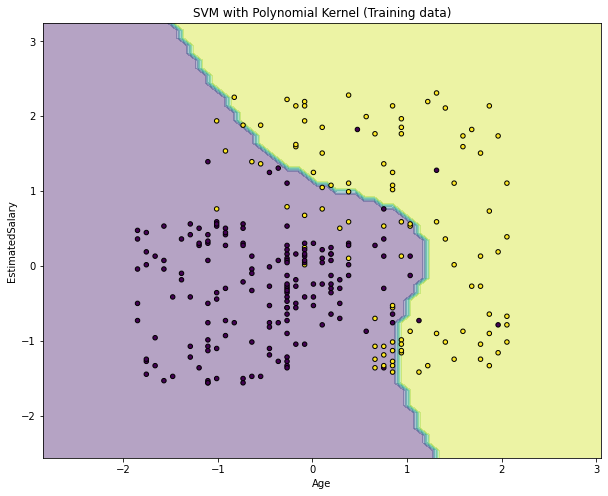

In [52]:
visualize_poly(x_train_,y_train_,'Training data')

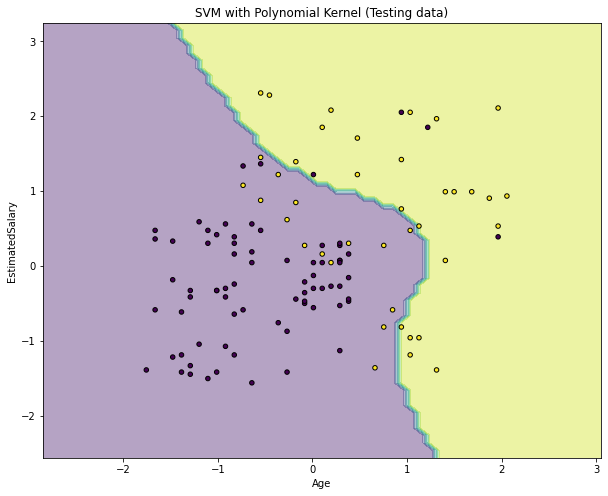

In [53]:
visualize_poly(x_test_,y_test_,'Testing data')